## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [11]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [12]:
url = "https://raw.githubusercontent.com/valentraphael/Data-Mining/refs/heads/main/property_dataset.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [13]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [15]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [16]:
df.isnull().sum() / len(df) * 100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [17]:
self_imputer = SimpleImputer(strategy='most_frequent')

df = pd.DataFrame(self_imputer.fit_transform(df), columns=df.columns)

df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [18]:
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [19]:
df = df.drop('Nama Daerah', axis=1)

3.

In [29]:
label_encoder = LabelEncoder()

area_category_map = {"Standard" : 3, "Below Standard": 4, "Sangat Premium": 1, "Premium": 2}
terjual_map = { "Belum": 1}
lebar_jalan_map = {"1-2 Mobil": 2, "< 1 Mobil":1, "> 2 Mobil": 3}
df['Area Category'] = df['Area Category'].map(area_category_map)
df['Terjual/Belum'] = df['Terjual/Belum'].map(terjual_map)
df['Arah Hadap Rumah'] = label_encoder.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = label_encoder.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_map)

df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [30]:
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")

df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(r"[.,]", "", regex=True)


check the data type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [32]:
for a in df.select_dtypes(include=['object']).columns:
    df[a] = df[a].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [34]:
# scaling data
sc = StandardScaler()

df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

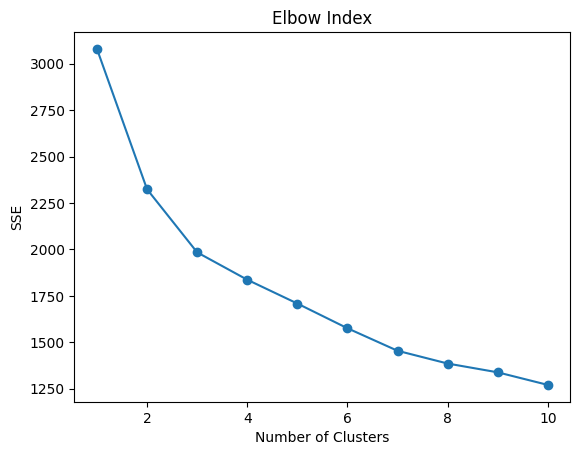

In [35]:
elbow_scores = []  # Changed 'sse' to 'elbow_scores' for better clarity

for num_clusters in range(1, 11):  # Changed 'i' to 'num_clusters' for readability
    kmeans = KMeans(n_clusters=num_clusters, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    elbow_scores.append(kmeans.inertia_)  # Appending to 'elbow_scores'

plt.plot(range(1, 11), elbow_scores, marker='o')  # Plotting 'elbow_scores'
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()

In [37]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), elbow_scores, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is", best_k)

the best k for your model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [38]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)

In [39]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=df.columns)

df['KMeans'] = y_pred

df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [41]:
# aggregation
# Group data by cluster and aggregate
cluster_summary_by_kmeans = df.groupby('KMeans').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Rename the index to "KMeans"
cluster_summary_by_kmeans = cluster_summary_by_kmeans.rename_axis("KMeans")

# Transpose the table
kmeans_cluster_summary_transposed = cluster_summary_by_kmeans.T

# Rename the columns with "Cluster {cluster_number}"
new_columns = [f"Cluster {col}" for col in kmeans_cluster_summary_transposed.columns]
kmeans_cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

# Display the transposed table
kmeans_cluster_summary_transposed

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [42]:
# count data from each cluster
df['KMeans'].value_counts().sort_index()

,count
KMeans,
0,156
1,50
2,102


In [24]:
# write down your interpretation from the cluster that you have been made
# Cluster 0: These properties are moderately sized, with more than two rooms, and fall within a mid-range price point. This cluster likely appeals to middle-class families seeking adequate living space.
# Cluster 1: This cluster represents larger, potentially more luxurious properties, characterized by spacious areas and a higher number of rooms. These properties are likely targeted towards affluent buyers or investors.
# Cluster 2: These properties are smaller and more affordable, often featuring compact layouts and possibly only one floor. This cluster likely attracts first-time homebuyers or small families seeking budget-friendly options.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

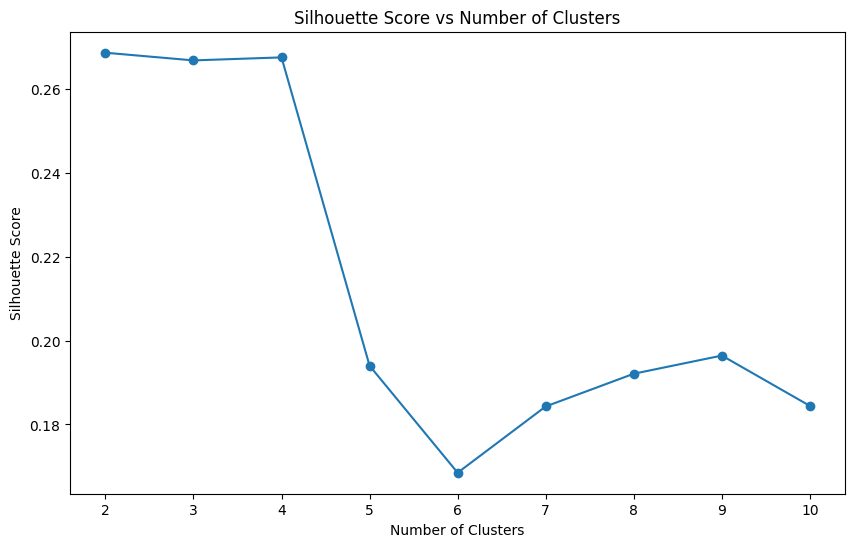

The optimal number of clusters is: 2


In [43]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores_agg = []  # Changed 'silhouette_scores' to 'silhouette_scores_agg'
cluster_range = range(2, 11)  # Changed 'k_range' to 'cluster_range'
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns) # Changed 'df' to 'df_scaled'

for num_clusters in cluster_range:  # Changed 'k' to 'num_clusters'
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    cluster_labels_agg = agglomerative.fit_predict(df_scaled)  # Changed 'cluster_labels' to 'cluster_labels_agg'

    silhouette_avg_agg = silhouette_score(df_scaled, cluster_labels_agg)  # Changed 'silhouette_avg' to 'silhouette_avg_agg'
    silhouette_scores_agg.append(silhouette_avg_agg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores_agg, marker='o')  # Plotting 'silhouette_scores_agg'
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_num_clusters = cluster_range[silhouette_scores_agg.index(max(silhouette_scores_agg))]  # Changed 'best_k' to 'optimal_num_clusters'
print(f"The optimal number of clusters is: {optimal_num_clusters}")

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [44]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(df)

In [45]:
df = pd.DataFrame(sc.inverse_transform(df), columns=df.columns)

df['Agglo'] = y_pred

df.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,5.007274,48585.403021,64111.300483,10.840508,8.211375,2.855123,2.904276e+19,2.0,5.180847,2.831030,3.437354,0.824675,0
1,5.808400,6271.757764,13035.610746,7.558241,4.962233,2.855123,2.388136e+18,2.0,5.180847,2.831030,2.884262,2.621254,0
2,5.007274,34480.854602,36445.301875,12.481641,9.835946,2.855123,2.240441e+19,2.0,3.162014,2.071429,3.437354,0.824675,0
3,3.405022,37906.244932,53470.531788,12.481641,11.460517,2.855123,2.572358e+19,2.0,5.180847,2.831030,3.437354,0.824675,0
4,4.206148,70749.693394,127955.912654,12.481641,11.460517,2.855123,4.148965e+19,2.0,2.152597,2.831030,3.437354,0.824675,0


Display the cluster summary in the form of a dataframe.

In [46]:
cluster_summary_1 = df.groupby(y_pred).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max']
})
cluster_summary_1 = cluster_summary_1.rename_axis("Agglo")
cluster_summary_1

Area Category                     Luas Tanah (m2)                 \
               mode       min       max            mean            min   
Agglo                                                                    
0          5.007274  3.405022  5.808400    44340.782341    3047.860983   
1          3.405022  3.405022  5.007274   168725.931519  121123.080605   

                     Luas Bangunan (m2)                                \
                 max               mean            min            max   
Agglo                                                                   
0      314758.381044       55038.645069    3246.103546  234363.599606   
1      201720.500142      207761.677868  127955.912654  255645.136996   

      Jumlah Kamar                       Jumlah Kamar Mandi             \
              mode        min        max               mode        min   
Agglo                                                                    
0        10.840508   5.917107  25.610708           8.211375   4.962233   
1        15.763908  12.481641  15.763908          11.460517  11.460517   

                 Tingkat/Lantai                       
             max            mode       min       max  
Agglo                                                 
0      24.457085        2.855123  2.348016  3.869338  
1      16.334230        2.855123  2.348016  3.362230

In [47]:
cluster_summary_2 = df.groupby(y_pred).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})
cluster_summary_2 = cluster_summary_2.rename_axis("Agglo")
cluster_summary_2

Harga Penawaran (dari Owner)                             Terjual/Belum  \
                              mean           min           max          mode   
Agglo                                                                          
0                     3.582317e+19  1.327669e+18  2.364910e+20           2.0   
1                     4.812799e+20  2.904276e+20  8.214951e+20           2.0   

      Arah Hadap Rumah Posisi Rumah            Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                                     mode  
Agglo                                                                         
0             5.180847      2.83103                                 3.437354  
1             5.180847      2.83103  [3.437354386754666, 3.9904471645475836]

In [48]:
df['Agglo'].value_counts().sort_index()

,count
Agglo,
0,304
1,4


In [28]:
# write down your interpretation from the cluster that you have been made
# "The Agglomerative clustering method divided the properties into two distinct groups.
# Cluster 0 represents luxury properties with higher price tags, expansive areas, and multi-story
# structures (up to 4 floors). These properties are likely attractive to affluent buyers seeking premium
# homes. Cluster 1, on the other hand, comprises budget-friendly properties that are typically smaller
# in size, have fewer rooms, and feature 1-2 floors. This segment likely caters to first-time homebuyers
# or those seeking more affordable options."

**Hierarchical Visualization**

Single Linkage

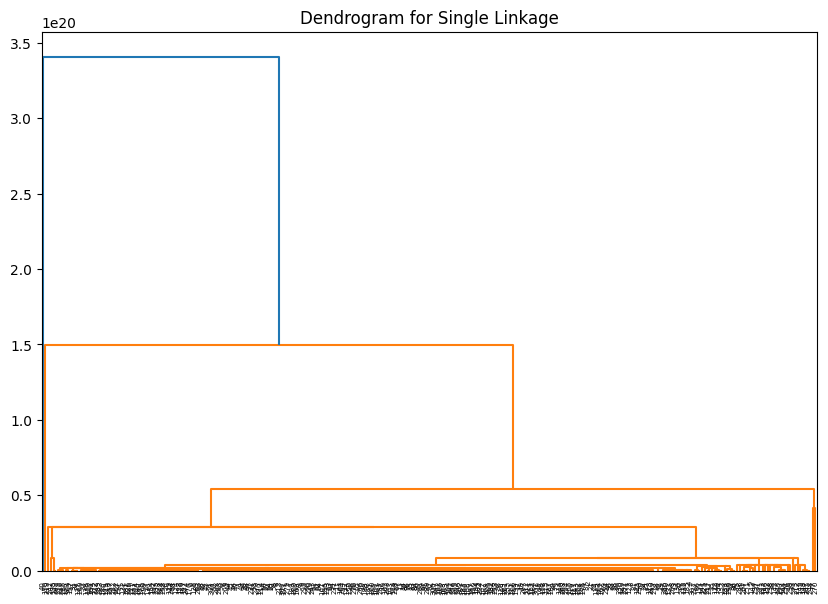

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()

complete linkage

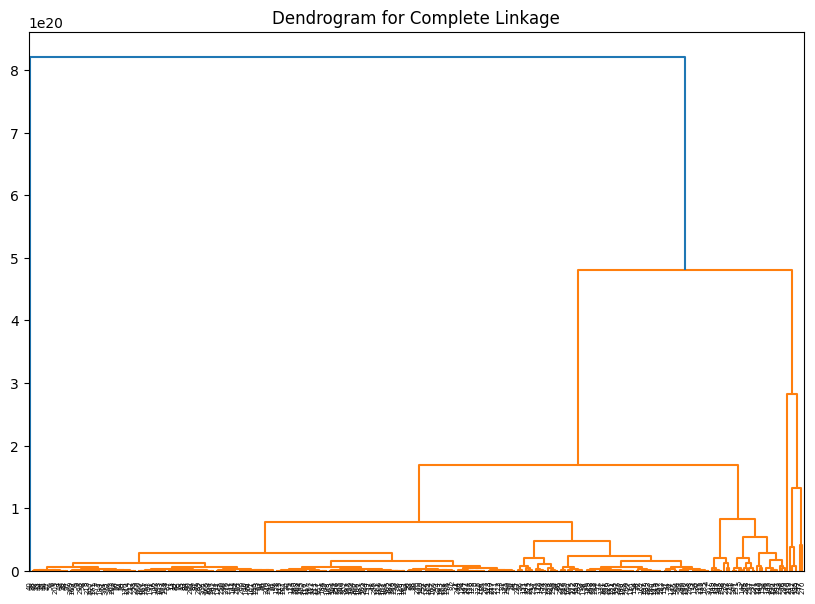

In [50]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df, method='complete'))
plt.show()

average linkage

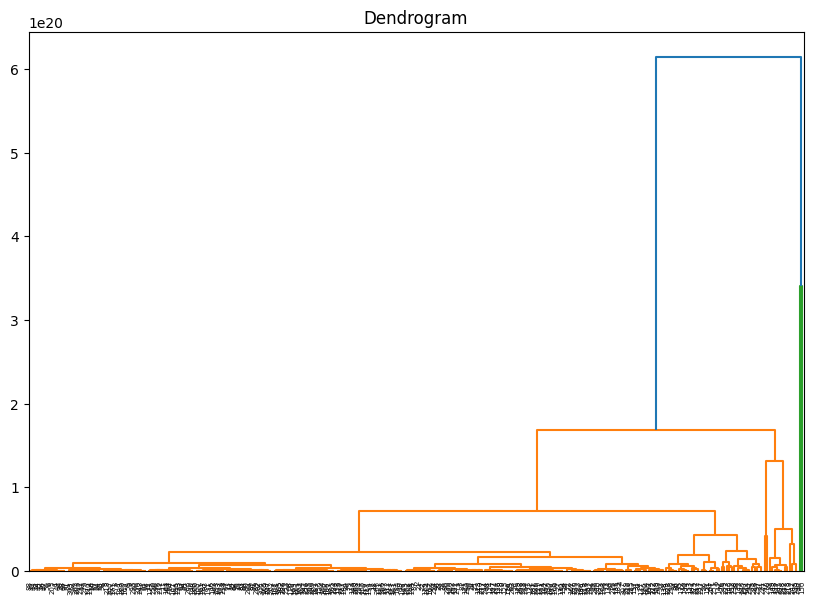

In [51]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()

ward method

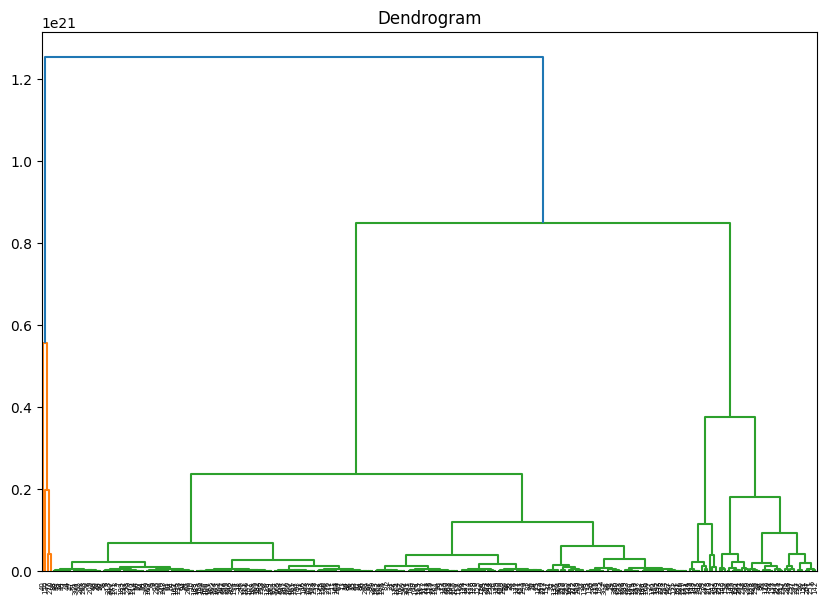

In [52]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df, method='ward'))
plt.show()